# Sentiment Analysis Using LLMs and Fine-tuned BERT model

## Introduction

In the project, I plan to analyze and compare the performance of sentiment classification models built with traditional deep learning approaches and large language model(LLM)-based methods. This analysis is motivated by my observation from the data science ethnography interview I conducted, where I noticed that some data scientists are shifting from building traditional machine learning and/or deep learning models to using LLMs with prompting directly for classification tasks. The transition makes me question the effectiveness, efficiency and reliability of the LLM based methods, as well as whether the deep learning/machine learning skills will remain essential for graduate-level data scientist work in the future. 


I expected this project will help me to understand not only how practical and real-world ways LLMs are used in business environments, but also the strengths and limitations of LLM-based sentiment analysis compared to the traditional model-based sentiment analysis technique. 


## Background or Related Work

Recent studies have shown interest in this topic. Some researchers have compared LLMs with traditional ML, such as tree-based, SVM, and naïve Bayes models, while others compared them with non-LLM DL models, such as the BERT model. Most papers point out that LLMs can outperform traditional ML models even with zero-shot learning ([Zhen Li et al. 2025](https://ink.library.smu.edu.sg/sis_research/9961); (Michailidis 2024)[https://doi.org/10.3390/bdcc8120199]; (Ghatora et al. 2024)[https://doi.org/10.3390/bdcc8120199]). However, researchers hold mixed views on whether fine-tuning non-LLM DL for domain specific tasks can lead to higher accuracy than LLMs. For example, [Boitel et al. (2023)](https://pure.port.ac.uk/ws/portalfiles/portal/78523961/UKCI_2023.pdf) found that fine-tuned BERT models for sentiment analysis were not only more cost efficient, but also achieved higher accuracy. In contrast, [Kang et al. (2025)](https://doi.org/10.3390/electronics14061090) argued that optimized modern LLMs, such as GPT-4o, are able to outperform fine-tuned BERT models for sentiment analysis through careful prompt engineering, such as few-shots prompting.

Given the evidence showing that the LLMs model can outperform traditional ML methods on sentiment analysis, I would like to focus my project on comparing DL and LLM models. While I will follow the general analytical structure of previous studies, I also intend to introduce several modifications. For example, While most existing studies focus on zero-shot and few-shot prompting, I intend to incorporate chain-of-thought prompting, which has been shown to significantly enhance LLM performance. Also, most of the literature uses three categories, positive, neutral, negative or two categories positive and negative datasets in their analysis, while my dataset contains 5 stars. It is interesting to see how the result would be different given this different setting. On the other hand, I will follow (Michailidis 2024)[https://doi.org/10.3390/bdcc8120199]’s standardized text-cleaning process, which includes removing brackets, URLs, HTML tags, and new lines to improve tokenization efficiency and reduce unnecessary computational costs. Finally, for performance evaluation, I will use the weighted-F1 score and accuracy, metrics widely employed in the literature for multi-class classification tasks.

## Research questions or hypotheses

My main research question is **How does the performance of sentiment prediction differ between LLM-based methods and non-LLM fine-tuned deep learning models?**. 

Besides the main question, I would also like to know the following questions through this project:
- In what situations should we choose LLMs over the fine-tuned DL model?
- How do different LLMs perform, and how can performance be improved through prompting?
- What are the risks of replacing traditional model-building methods with LLMs?


## Methodology & Data

### Data 
I plan to use the [Amazon-Reviews-2023 datasets from McAuley-Lab](https://amazon-reviews-2023.github.io/). This dataset includes three different components: user reviews, item Metadata, and item links, covering data from May. 1996 to Sep. 2023. For this project, I will focus on the user reviews datasets, which contain information such as the rating, title, text, use_id, and product_id. The data includes approximately 571.54M reviews, written by 54.51M different users for 48.19M products, making it one of the most comprehensive publicly available review datasets.
The data is suitable for my research goal because it contains a huge amount of reviews with ratings. It allows me to evaluate and compare the performance of traditional deep learning models and LLM-based methods on sentiment classification without the need for additional manual labelling.  Moreover, the 1-5 star rating scale in the data allows me to test how well the models capture nuanced sentiment differences beyond the simple negative/positive labels. However, due to limited computation resource, I will only use the `All Beauty` category in the dataset.

According to the McAuley-Lab, the data is not assigned to a formal license. However, it specifies the dataset should be used for research purposes and under ethical guidelines and any applicable legal standards. [Quote](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/discussions/1#65eb9951770aa0e25d718bc0):

> 
> It is important to clarify that we are not in a position to assign a license to this dataset or dictate the terms of its usage. We have made the dataset available primarily for research purposes. While the dataset has been widely used within academia, we must emphasize that its use comes with a responsibility to adhere to ethical guidelines and any applicable legal standards.
>
> Thank you for your understanding!
> 

From an ethical perspective, it is important to ensure that the user of the data should avoid to re-identify individuals in the datasets for surveillance purposes.




### Methodology

I will design two different scenarios to simulate two different kinds of tasks in the real world situation:
    - Simple task: only contains 1 and 5 star reviews
    - Complex task: contains 1, 2, 3, 4, and 5 star reviews
I will use the weighted-F1 score as the primary performance metric, as it is widely adopted for evaluating multi-class classification tasks. For the pretrained deep learning (DL) model, I plan to fine-tune a RoBERTa model, which is an enhanced variant of BERT that has demonstrated strong performance across various text analysis applications. Due to resource and finance constraints, I will utilize the free resourses from Google AI Studio (Gemini 2.5 Pro) and Groq (GPT OSS 120B, Llama 4 Maverick, and Qwen 3 32b) to evaluate the performance of LLMs.

1. Data Gathering: To reduce the computation cost, I will try to reduce the data amount. Therefore, in this part, I will filter only `All Beauty` category, then perform a random sample of 1000 reviews based on the stars as the test set for performance evaluation. The test sample size is similar to what [Boitel et al. (2023)](https://pure.port.ac.uk/ws/portalfiles/portal/78523961/UKCI_2023.pdf) and [Kang et al. (2025)](https://doi.org/10.3390/electronics14061090)  did in their studies. For the fine-tuning part, I will also random sample 10,000, 50,000, 100,000 reviews as the training data. Note that 100,000 training data will be only used in the complex task scenario due to computation constraints.

2. Processing: After that, I will follow the standard text-cleaning process for the input text, which includes removing brackets, URLs, HTML tags, and new lines. Note this text cleaning process will be only implemented to data for the BERT model.

3. Training/learning: 
    - Fine-tuning: In this part, I will follow the standard process to fine-tune the RoBERTa, which includes tokenizing text into the model’s input format, employing suitable optimizer and learning rate to in training epochs.
    - Prompting: For the LLMs, I will consider zero-shot, few-shot, chain-of-thought, and chain-of-thought with few-shot prompting methods to predict the star of the review. All of the 4 different LLMs will be implemented with the same 4 different prompting methods in the complex task scenario. In contrast, only Gemini 2.5 pro will be used in the simple task scenario with the 4 prompting methods due to time and resourse constraints.
4. Evaluation: After predicting, I will use the pre-defined 1000 test set to analyze their weighted-F1 score and accuracy, as well as a confusion matrix to compare the performance between LLMs and BERT models.

For the end-to-end pipeline, Please see the plot below:

<p align="center">
  <img src="img/pipeline.png" alt="Pipeline" />
</p>



## Findings
The codes below are the end-to-end analysis to evaluate the performance of LLMs compared to fine-tuned BERT model. In order to execute the notebook successfully, please ensure the `/results` folder contains the necessary predictions results from LLMs and fine-tuned BERT model. Please refer to the helper notebooks for more details.

### 0. Settings

In [1]:
# Install dependencies
! pip install -r requirements.txt

Load libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os


### 1. Simple Task (Binary Classification)

To start the analysis, I first loaded the training and test datasets and conducted an exploratory analysis.

In [3]:
test_2 = pd.read_parquet('./data/test_10k_2.parquet') # Note that all of the test data for 2-class model are the same
train_2_10k = pd.read_parquet('./data/train_10k_2.parquet')
train_2_50k = pd.read_parquet('./data/train_50k_2.parquet')


We can see that in the test dataset, approximately 80% of reviews are 5-star and 20% are 1-star. This distribution aligns with expectations, as people generally tend to leave more positive reviews. It also shows the importance of using the weighted F1 score to account for the imbalance in the data.

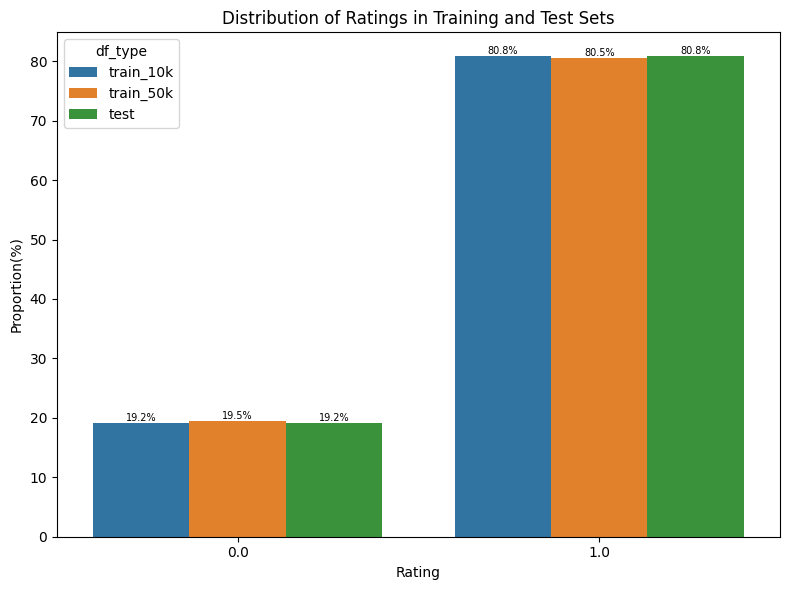

In [ ]:
def get_distribution(df: pd.DataFrame, label_col: str='rating') -> pd.DataFrame:
    '''
        Get the distribution of ratings in the dataframe.
    '''
    distribution = df[label_col].value_counts(normalize=True).sort_index()*100
    return distribution.reset_index()

def plot_distribution(train_df_dict: dict[str, pd.DataFrame], test_df: pd.DataFrame, label_col='rating') -> None:
    '''
        Plot the distribution of ratings in training and test datasets.
    '''

    test_df = test_df.copy()
    
    # Add a column to indicate dataset type
    test_df['df_type'] = 'test'
    for key in train_df_dict:
        train_df_dict[key] = train_df_dict[key].copy()
        train_df_dict[key]['df_type'] = key
    # Combine all dataframes
    df_temp = pd.concat(list(train_df_dict.values()) + [test_df], axis=0)

    # Plot the distribution
    plt.figure(figsize=(8,6))
    ax = sns.barplot(data=df_temp, x=label_col, y='proportion', hue='df_type')
    plt.title('Distribution of Ratings in Training and Test Sets')
    plt.xlabel('Rating')
    plt.ylabel('Proportion(%)') 

    # annotate bars with percentage values
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=7)

    plt.tight_layout()
    plt.show()


# Generate and plot distributions
df_temp_test = get_distribution(test_2, label_col='rating')
df_temp_train_10k = get_distribution(train_2_10k, label_col='rating')
df_temp_train_50k = get_distribution(train_2_50k, label_col='rating')
plot_distribution({'train_10k': df_temp_train_10k, 'train_50k': df_temp_train_50k}
                  , df_temp_test, label_col='rating')

Then, I combine the LLM predictions and BERT predictions into a single dataframe

In [ ]:
def get_cleaned_test(df_test: pd.DataFrame, df_test_llm_list: list[pd.DataFrame], df_test_bert: pd.DataFrame)->pd.DataFrame:
    '''
    Merge predictions from BERT and LLM models into the test dataframe and convert relevant columns to integer type.
    '''

    # Merge BERT predictions
    bert_cols = df_test_bert.columns[df_test_bert.columns.str.contains('pred_')].tolist()
    df_test[bert_cols] = df_test_bert[bert_cols]
    
    # Merge LLM predictions
    llm_cols = []
    for df_test_llm in df_test_llm_list:
        llm_col = df_test_llm.columns[df_test_llm.columns.str.contains('pred_')].tolist()
        df_test[llm_col] = df_test_llm[llm_col]
        llm_cols.extend(llm_col)
    
    # Convert relevant columns to integer type
    cols = ['rating'] + bert_cols + llm_cols 
    df_test[cols] = df_test[cols].astype(int)
    
    return df_test

## predictions on 2 categories
test_llm_2 = pd.read_csv('results/test_2_llm_gemini_25_pro.csv')
test_bert_2 = pd.read_csv('results/test_2_bert_all.csv')

test_2 = get_cleaned_test(df_test=test_2, df_test_llm_list=[test_llm_2], df_test_bert=test_bert_2)
test_2.head()
    

,rating,text,text_cleaned,input_ids,attention_mask,pred_bert_10k,pred_bert_50k,pred_0s,pred_2s,pred_cot,pred_cot_2s
0,1,"First off, let me say, I absolutely have been ...","First off, let me say, I absolutely have been ...","[0, 10993, 160, 6, 905, 162, 224, 6, 38, 3668,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,1,1,1,1
1,1,I just received them but wore it to work. This...,I just received them but wore it to work. This...,"[0, 100, 95, 829, 106, 53, 5328, 24, 7, 173, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,1,1,1,1,1
2,1,Excellent quality.,Excellent quality.,"[0, 46887, 1318, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,1,1,1,1
3,0,"I used this to shave, trim my lip hair, to tri...","I used this to shave, trim my lip hair, to tri...","[0, 100, 341, 42, 7, 30749, 6, 10723, 127, 113...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
4,1,They just might have done something here! I br...,They just might have done something here! I br...,"[0, 1213, 95, 429, 33, 626, 402, 259, 328, 38,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,1,1,1,1


Then I calculate the performance metrics and save them into a dataframe.

In [41]:
def get_metrics(y_true:pd.Series, y_pred:pd.Series, categories:int=2, average:str='auto')->tuple:
    """
    Calculate precision, recall, F1 score, accuracy, and confusion matrix for given true and predicted labels.
    """

    # Determine averaging method
    if average == 'auto':
        if categories == 2:
            average = 'binary'
        else:
            average = 'weighted'
    else:
        average = None
    
    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=average)
    accuracy = accuracy_score(y_true, y_pred)
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])

    return precision, recall, f1, accuracy, confusion_matrix

# Loop through models and calculate metrics
metrics = {}
models = {'bert_10k':'pred_bert_10k', 'bert_50k':'pred_bert_50k', 
          'gemini_0s':'pred_0s', 'gemini_2s':'pred_2s', 
          'gemini_cot':'pred_cot', 'gemini_cot_2s':'pred_cot_2s'}
for model, result in models.items():
    precision, recall, f1, accuracy, confusion_matrix = get_metrics(test_2['rating']
                                                                    , test_2[result]
                                                                    , categories=2, average='auto')
    metrics[model] = {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy, 'confusion_matrix': confusion_matrix}
df_metrics_2 = pd.DataFrame(metrics).T.reset_index()
df_metrics_2

,index,precision,recall,f1,accuracy,confusion_matrix
0,bert_10k,0.994956,0.976485,0.985634,0.977,Predicted 0 1 Actual 0 ...
1,bert_50k,0.988916,0.993812,0.991358,0.986,Predicted 0 1 Actual 0 ...
2,gemini_0s,0.997491,0.983911,0.990654,0.985,Predicted 0 1 Actual 0 ...
3,gemini_2s,0.997491,0.983911,0.990654,0.985,Predicted 0 1 Actual 0 ...
4,gemini_cot,0.997487,0.982673,0.990025,0.984,Predicted 0 1 Actual 0 ...
5,gemini_cot_2s,0.996245,0.985149,0.990666,0.985,Predicted 0 1 Actual 0 ...


From the bar plot, we can see that fine-tuning a pre-trained BERT model with 50K training samples yields the best performance in both F1 score and accuracy. However, the difference between the fine-tuned model and the Gemini model is minimal, only about 0.1%. Additionally, prompting does not appear to improve LLM performance on this simple task.

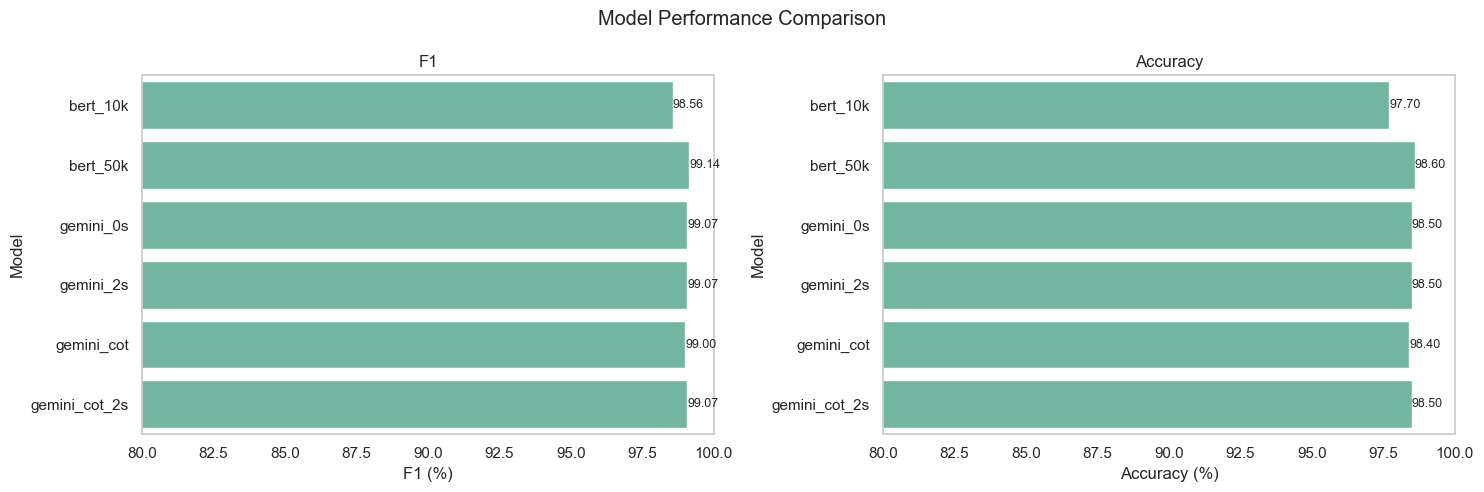

In [ ]:
def plot_bar_metrics(df_metrics: pd.DataFrame, metric_name_list: list[str])-> None:
    '''
        Plot a horizontal bar chart for a given metric across different models.
    '''
    df_metrics_copy = df_metrics.copy()
    fig, ax = plt.subplots(figsize=(15,5),nrows=1, ncols=len(metric_name_list))
    for ind, metric in enumerate(metric_name_list):
        # plot bar chart
        sns.barplot(x=round(df_metrics_copy[metric]*100, 2), y=df_metrics_copy['index'], orient='h', ax=ax[ind])
        ax[ind].set_title(f'{metric.capitalize()}')
        ax[ind].set_ylabel('Model')
        ax[ind].set_xlabel(metric.capitalize() + ' (%)')
        ax[ind].set_xlim(80, 100)
        
        # Annotate bars with metric values
        for container in ax[ind].containers:
            ax[ind].bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

    fig.suptitle('Model Performance Comparison')
    fig.tight_layout()

plot_bar_metrics(df_metrics_2, ['f1', 'accuracy'])

According to the confusion matrix, the fine-tuned model produces more false negatives, while Gemini (zero-shot) produces more false positives. This indicates that Gemini has higher precision, meaning it is more conservative in identifying positive sentiment. In contrast, the fine-tuned model has higher recall, meaning it is more aggressive in predicting positive sentiment.

In [ ]:
def plot_confusion_matrix(confusion_matrix: pd.DataFrame, model_name: str):
    '''
        Plot the confusion matrix for a given model.
    '''
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

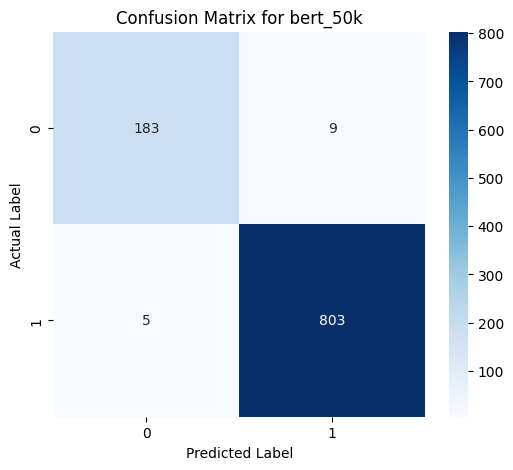

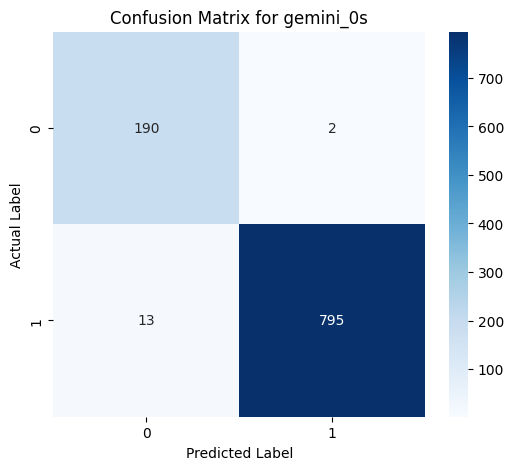

In [9]:
plot_confusion_matrix(df_metrics_2.loc[df_metrics_2['index'] == 'bert_50k', 'confusion_matrix'].values[0], 'bert_50k')
plot_confusion_matrix(df_metrics_2.loc[df_metrics_2['index'] == 'gemini_0s', 'confusion_matrix'].values[0], 'gemini_0s')

### 2. Complex Task (Multiclass Classification)

To start the analysis, I first loaded the training and test datasets and conducted an exploratory analysis.

In [10]:
test_5 = pd.read_parquet('data/test_10k_5.parquet')
train_10k_5 = pd.read_parquet('data/train_10k_5.parquet')
train_50k_5 = pd.read_parquet('data/train_50k_5.parquet')
train_100k_5 = pd.read_parquet('data/train_100k_5.parquet')

In our test dataset, approximately 60.5% of reviews are 5-star, while only 14.1% are 1-star. I was surprised that 1-star reviews account for less than 15% and that the proportion of 4-star reviews is close to that of 1-star reviews. However, the relatively low percentages of 2-star, 3-star, and 4-star reviews align with expectations, as people tend to leave either very positive or very negative reviews. This distribution also underscores the importance of using the weighted F1 score to account for the imbalance in the data.

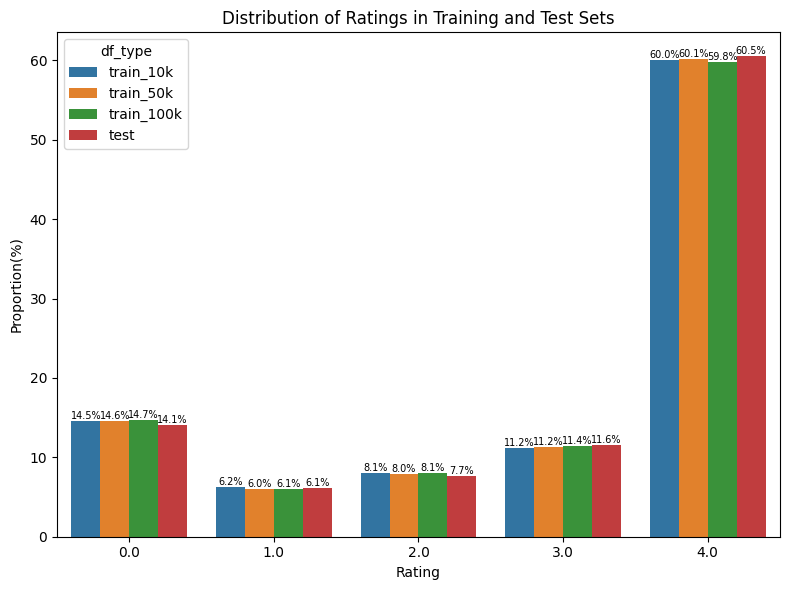

In [11]:
df_temp_test = get_distribution(test_5, label_col='rating')
df_temp_train_10k = get_distribution(train_10k_5, label_col='rating')
df_temp_train_50k = get_distribution(train_50k_5, label_col='rating')
df_temp_train_100k = get_distribution(train_100k_5, label_col='rating')
plot_distribution({'train_10k': df_temp_train_10k, 'train_50k': df_temp_train_50k, 'train_100k': df_temp_train_100k}
                  , df_temp_test
                  , label_col='rating')

Then again, we combine the LLM predictions and BERT predictions into a single dataframe

In [ ]:
## Load predictions on 5 categories
llm_lists = os.listdir('results/')
llm_lists = [file for file in llm_lists if file.startswith('test_5_llm')]
test_llm_list = [pd.read_csv(os.path.join('results/', file)) for file in llm_lists]
test_bert_5 = pd.read_csv('results/test_5_bert_all.csv')

# Clean and combine test data with predictions
test_5 = get_cleaned_test(df_test=test_5, df_test_llm_list=test_llm_list, df_test_bert=test_bert_5)
test_5.head()

,rating,text,text_cleaned,input_ids,attention_mask,pred_bert_10k,pred_bert_50k,pred_bert_100k,pred_llama_0s,pred_llama_5s,...,pred_gemini_cot,pred_gemini_cot_5s,pred_gpt_0s,pred_gpt_5s,pred_gpt_cot,pred_gpt_cot_5s,pred_qwen3_0s,pred_qwen3_5s,pred_qwen3_cot,pred_qwen3_cot_5s
0,4,Used to freshen up linens,Used to freshen up linens,"[0, 47640, 7, 21862, 2457, 62, 24248, 1290, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",4,4,4,3,4,...,2,2,3,3,3,2,2,2,3,2
1,0,need more proof:(to order!!!!,need more proof:(to order!!!!,"[0, 30484, 55, 6461, 48329, 560, 645, 32376, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",4,4,4,1,2,...,1,1,1,1,1,1,1,1,1,1
2,4,"This is a good flat iron, it has different tem...","This is a good flat iron, it has different tem...","[0, 713, 16, 10, 205, 3269, 6440, 6, 24, 34, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4,4,4,4,4,...,3,4,4,4,4,4,3,4,4,4
3,4,This is the best gel I’ve tried. Super hold w...,This is the best gel I’ve tried. Super hold wi...,"[0, 713, 16, 5, 275, 17916, 38, 17, 27, 548, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,It comes with 1 set of the 4 smaller sizes and...,It comes with 1 set of the 4 smaller sizes and...,"[0, 243, 606, 19, 112, 278, 9, 5, 204, 2735, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4,3,3,4,4,...,4,4,3,4,3,4,2,3,3,3


Then again, we calculate the performance metrics and save them into a dataframe.

In [48]:
# get prediction columns
models = {}
for i in test_5.columns:
    if i.startswith('pred_'):
        col = i.split('pred_')[1]
        models[col] = i

# Loop through models and calculate metrics
metrics_5 = {}
for model, result in models.items():
    precision, recall, f1, accuracy, confusion_matrix = get_metrics(test_5['rating']
                                                                    , test_5[result]
                                                                    , categories=5
                                                                    , average='auto')
    metrics_5[model] = {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

df_metrics_5 = pd.DataFrame(metrics_5).T.reset_index()

# generate model and method columns
df_metrics_5['model'] = df_metrics_5['index'].apply(lambda x: x.split('_')[0])
df_metrics_5['method'] = df_metrics_5['index'].apply(lambda x: '_'.join(x.split('_')[1:]))
df_metrics_5

,index,precision,recall,f1,accuracy,confusion_matrix,model,method
0,bert_10k,0.715963,0.75,0.725686,0.75,Predicted 0 1 2 3 4 Actual ...,bert,10k
1,bert_50k,0.75513,0.77,0.75556,0.77,Predicted 0 1 2 3 4 Actual ...,bert,50k
2,bert_100k,0.757087,0.773,0.762549,0.773,Predicted 0 1 2 3 4 Actual ...,bert,100k
3,llama_0s,0.757173,0.752,0.753303,0.752,Predicted 0 1 2 3 4 Actual ...,llama,0s
4,llama_5s,0.744619,0.746,0.744185,0.746,Predicted 0 1 2 3 4 Actual ...,llama,5s
5,llama_cot,0.751493,0.739,0.744054,0.739,Predicted 0 1 2 3 4 Actual ...,llama,cot
6,llama_cot_5s,0.759165,0.738,0.745387,0.738,Predicted 0 1 2 3 4 Actual ...,llama,cot_5s
7,gemini_0s,0.759273,0.683,0.711637,0.683,Predicted 0 1 2 3 4 Actual ...,gemini,0s
8,gemini_5s,0.762898,0.724,0.73914,0.724,Predicted 0 1 2 3 4 Actual ...,gemini,5s
9,gemini_cot,0.751946,0.684,0.710285,0.684,Predicted 0 1 2 3 4 Actual ...,gemini,cot


Let’s start by discussing the performance of LLMs and how prompting strategies affect their results. This plot shows the performance of various LLMs using different prompting techniques. The x-axis represents the prompting method—from zero-shot, few-shot, and chain-of-thought, to chain-of-thought with few-shot, and the y-axis shows the performance. The colors indicate different LLMs.

Overall, the results show that Llama performs the best on our Amazon Review Data. Prompting has a noticeable impact on performance. For some models, such as Qwen and Gemini, prompting improves performance. However, not all LLMs benefit from prompting. In fact, for Llama 4, to much prompting can actually hurt its performance.

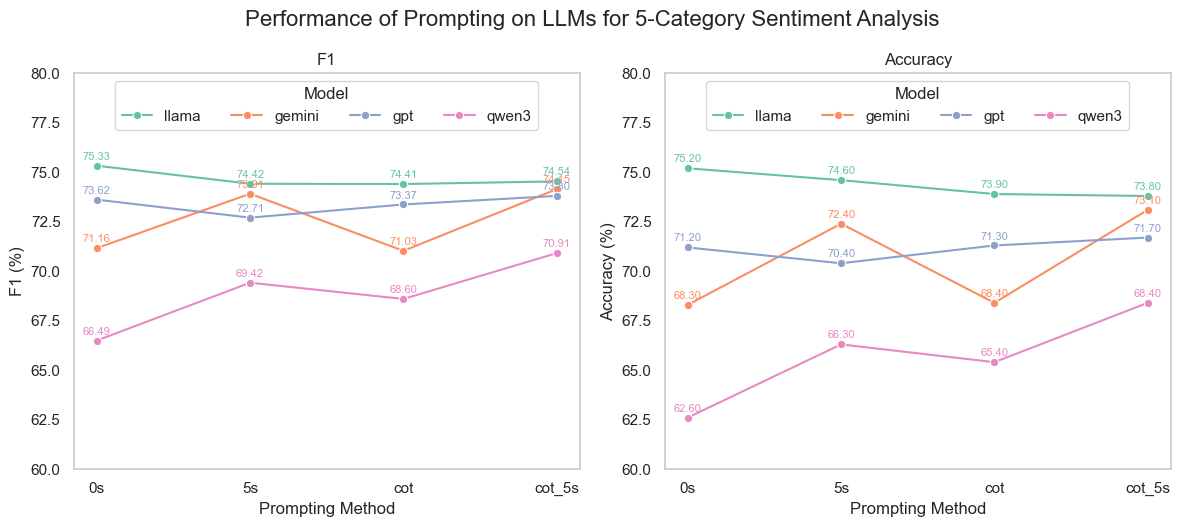

In [49]:
df_temp = df_metrics_5[df_metrics_5['model'] != 'bert'].copy()
def plot_prompting_performance(df_temp: pd.DataFrame)-> None:
    '''
        Plot the performance of prompting on LLMs for 5-category sentiment analysis.
    '''
    df_temp_copy = df_temp.copy()
    # Create subplots
    fig, ax = plt.subplots(figsize=(12, 5),nrows=1, ncols=2)

    # for each metric, plot the lineplot
    for ind, metric in enumerate(['f1', 'accuracy']):
        df_temp_copy.loc[:, metric] = df_temp_copy[metric]*100
        df_temp_copy = df_temp_copy.sort_values(by='method', ascending=True)
        # Plot lineplot with markers
        sns.lineplot(data=df_temp_copy, x='method', y=metric, hue='model', marker='o', ax=ax[ind], palette='Set2')

        ax[ind].set_title(f'{metric.capitalize()}')
        ax[ind].set_xlabel('Prompting Method')
        ax[ind].set_ylabel(f'{metric.capitalize()}' + ' (%)')
        ax[ind].legend(title='Model', loc='upper center', ncol=4)
        ax[ind].set_ylim(60, 80)

        # Annotate each point with its metric value
        for line in ax[ind].get_lines():
            for x, y in zip(line.get_xdata(), line.get_ydata()):
                ax[ind].text(x, y + 0.2, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color=line.get_color())

    fig.tight_layout()
    fig.suptitle('Performance of Prompting on LLMs for 5-Category Sentiment Analysis', y=1.05, fontsize=16)
    plt.show()

plot_prompting_performance(df_temp)


To analyze how prompting affects the prediction for each rating, I broke down the prediction distributions across different prompting methods. The results show that prompting changes the distribution of predictions. Under zero-shot settings, we can observe each LLM’s inherent prior for sentiment. Surprisingly, all tested LLMs predict lower satisfaction than what is reflected in the actual data. Among them, Qwen is the least optimistic, predicting only 46.2% 5-star reviews, whereas the true proportion of 5-star reviews in the test set is 60%. We also see that with prompting, all LLMs become “happier” with the products. That is, the percentage of predicted 5-star reviews increases.

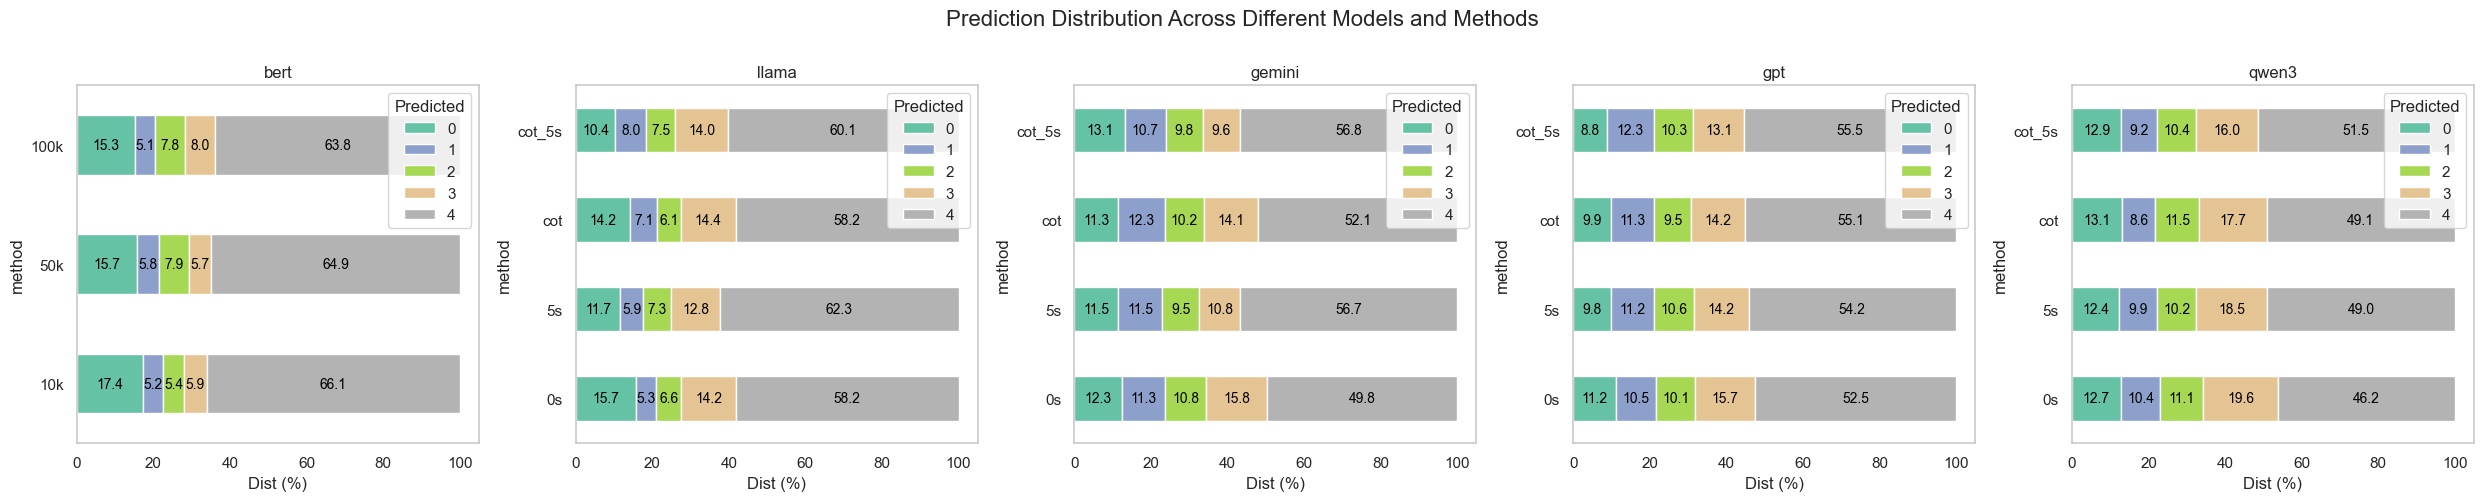

In [50]:
df_temp2 = df_metrics_5['confusion_matrix'].apply(lambda x: x.sum(axis=0))
df_temp2[['index', 'model', 'method']] = df_metrics_5[['index', 'model', 'method']]


def plot_prediction_distribution(df_temp:pd.DataFrame)-> None:
    '''
        Plot the prediction distribution across different models and methods.
    '''

    # Use seaborn style
    sns.set_theme(style="whitegrid", palette="Set2")
    sns.set_style({"axes.grid": False})

    # Create subplots
    df_temp_copy = df_temp.copy()
    fig, ax = plt.subplots(figsize=(25,5), nrows=1, ncols=5)

    # for each model, plot the distribution
    for ind, model in enumerate(df_temp_copy['model'].unique()):
        df_pivot = df_temp_copy[df_temp_copy['model'] == model].copy()
        # calculate into percentage
        df_pivot[[0, 1, 2, 3, 4]] = df_pivot[[0, 1, 2, 3, 4]].div(df_pivot[[0, 1, 2, 3, 4]].sum(axis=1), axis=0) * 100
        df_pivot = df_pivot.set_index('method')

        # plot horizontal stacked bar chart
        df_pivot.plot(
            kind='barh',
            stacked=True,
            colormap='Set2',
            ax = ax[ind]

        )

        # add labels
        for container in ax[ind].containers:
            ax[ind].bar_label(container, fmt='%.1f', label_type='center', fontsize=10, color='black')
            
        ax[ind].set_title(model)
        ax[ind].set_xlabel('Dist (%)')
    fig.suptitle('Prediction Distribution Across Different Models and Methods', y=1, fontsize=16)    
    fig.tight_layout()

plot_prediction_distribution(df_temp2)

    

Second, let’s compare the fine-tuned models with the best performance achieved by the LLMs. This plot shows the performance of the fine-tuned models, where the x-axis indicates the sample size used for fine-tuning and the y-axis shows the resulting performance. The horizontal dotted lines represent the best performance of each LLM. 

Our best fine-tuned BERT model achieves 76.25% F1, and 77.30% accuracy. We can see that when the fine-tuning sample size is small (10K), the fine-tuned models perform worse than the LLMs. However, as the training size increases (50k+), the fine-tuned models eventually surpass the LLMs in performance.



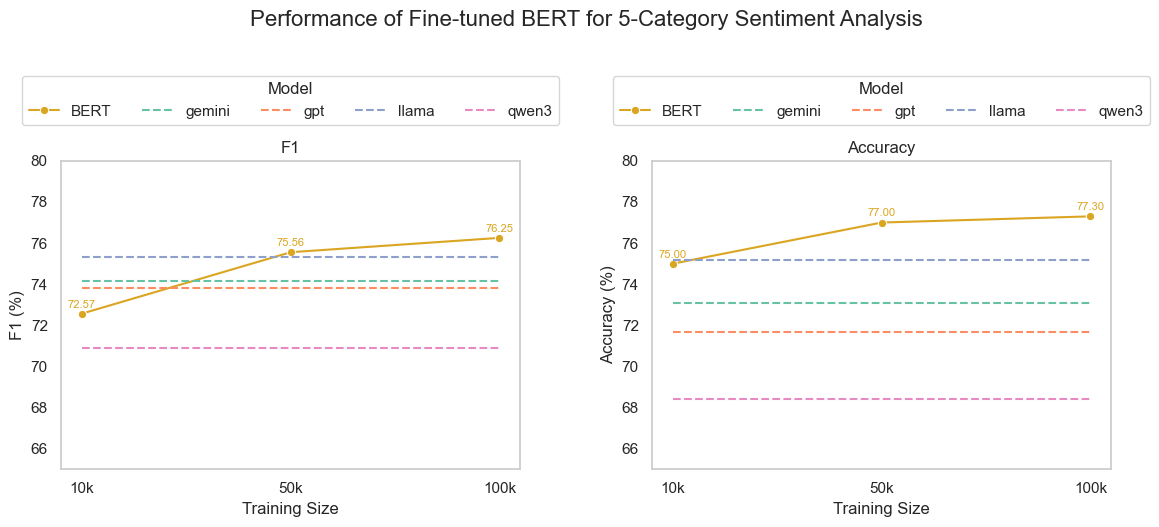

In [51]:
# Make a temp dataframe for best LLM performances so that we can compare with fine-tuned BERT and plot together easily
df_temp = df_metrics_5[df_metrics_5['model'] != 'bert'].copy()
df_temp_llm_best = df_temp.groupby('model').agg(best_f1=('f1', 'max'), best_accuracy=('accuracy', 'max')).reset_index()
df_temp_bert = df_metrics_5[df_metrics_5['model'] == 'bert'].copy()

def plot_finetuned_bert_performance(df_temp_bert: pd.DataFrame, df_temp_llm_best: pd.DataFrame, ylim:tuple[int, int]=(65,80))-> None:
    '''
        Plot the performance of fine-tuned BERT against best prompting performances of LLMs.
    '''
    df_temp_bert_copy = df_temp_bert.copy()
    df_temp_llm_best_copy = df_temp_llm_best.copy()

    # Create subplots
    fig, ax = plt.subplots(figsize=(12, 5),nrows=1, ncols=2)

    # for each metric, plot the lineplot
    for ind, metric in enumerate(['f1', 'accuracy']):
        df_temp_bert_copy.loc[:, metric] = (df_temp_bert_copy[metric]*100)

        # Plot lineplot with markers
        sns.lineplot(data=df_temp_bert_copy, x='method', y=metric, color='Goldenrod', marker='o', ax=ax[ind], label='BERT')
        
        # Annotate each point with its value
        for line in ax[ind].get_lines():
            for x, y in zip(line.get_xdata(), line.get_ydata()):
                ax[ind].text(x, y + 0.2, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color=line.get_color())
        
        # Plot best LLM performances            
        for llm in df_temp_llm_best_copy['model']:
            df_temp_bert_copy.loc[:, f'{llm+ '_best_' + metric}'] = df_temp_llm_best_copy[df_temp_llm_best_copy['model'] == llm][f'best_{metric}'].values[0] * 100
            sns.lineplot(data=df_temp_bert_copy, x='method', y=llm+ '_best_' + metric, ax=ax[ind], linestyle='--', label=llm)
        
        ax[ind].set_title(f'{metric.capitalize()}')
        ax[ind].set_xlabel('Training Size')
        ax[ind].set_ylabel(f'{metric.capitalize()}' + ' (%)')
        ax[ind].legend(title='Model',loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=5)
        ax[ind].set_ylim(ylim[0], ylim[1])

    fig.tight_layout()
    fig.suptitle('Performance of Fine-tuned BERT for 5-Category Sentiment Analysis', y=1.05, fontsize=16)
    plt.show()

plot_finetuned_bert_performance(df_temp_bert, df_temp_llm_best)


Sometimes predicting the exact sentiment rating is not necessary. Instead, we may only need the general sense of the sentiment. Therefore, in the final part of my analysis, I evaluate the 1-off performance of the LLMs and the fine-tuned BERT model. In this setting, if the actual review is 3 stars, then predictions of 2, 3, or 4 stars are considered similar in sentiment and counted as correct. To proceed with this evaluation, we first need to define a function that calculates the 1-off metric.

In [52]:
def calcaulate_1_off_metrics(cm:pd.DataFrame)-> dict:
    '''
        Calculate 1-off precision, recall, f1, accuracy from confusion matrix for 5-category classification.
    '''
    results = []
    correct = 0
    total = cm.values.sum()

    # for each star rating
    for i in range(5):

        # predicted positives
        p_predict = cm.loc[:, i].sum()
        # one-off correct predictions (in precision setting)
        p_corr = sum(cm.iloc[i-1:i+2, i] if i >0 and i <4 
                    else (cm.iloc[i:i+2, i] if i==0 
                            else cm.iloc[i-1:i+1, i]))
        precision = p_corr / p_predict if p_predict !=0 else 0

        # actual positives
        r_actual = cm.loc[i, :].sum()
        # one-off correct predictions (in recall setting)
        r_corr = sum(cm.iloc[i, i-1:i+2] if i >0 and i <4 
                    else (cm.iloc[i, i:i+2] if i==0 
                            else cm.iloc[i, i-1:i+1]))
        recall = r_corr / r_actual if r_actual !=0 else 0

        # weight for each star rating
        w = r_actual / total
        # F1 score
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) !=0 else 0
        # accumulate correct predictions
        correct += p_corr
        # load into results
        results.append([precision, recall, f1, w])
    
    # calculate the weighted metrics     
    final_precision = sum([r[3]* np.array(r[:3]) for r in results])

    # calculate accuracy
    accuracy = correct / total
    
    return {'precision': final_precision[0],
            'recall': final_precision[1],
            'f1': final_precision[2],
            'accuracy': accuracy
           }

one_off_metrics_5 = {}
for model, result in models.items():
        # get confusion matrix
        cm = df_metrics_5.loc[df_metrics_5['index'] == model, 'confusion_matrix'].values[0]
        one_off_metrics_5[model] = calcaulate_1_off_metrics(cm)
df_one_off_metrics_5 = pd.DataFrame(one_off_metrics_5).T.reset_index()

# Generate model and method columns
df_one_off_metrics_5['model'] = df_one_off_metrics_5['index'].apply(lambda x: x.split('_')[0])
df_one_off_metrics_5['method'] = df_one_off_metrics_5['index'].apply(lambda x: '_'.join(x.split('_')[1:]))
df_one_off_metrics_5

,index,precision,recall,f1,accuracy,model,method
0,bert_10k,0.920599,0.926,0.922572,0.926,bert,10k
1,bert_50k,0.936349,0.935,0.934453,0.935,bert,50k
2,bert_100k,0.944091,0.944,0.943752,0.944,bert,100k
3,llama_0s,0.954642,0.955,0.954644,0.955,llama,0s
4,llama_5s,0.941154,0.944,0.941911,0.944,llama,5s
5,llama_cot,0.950430,0.951,0.950578,0.951,llama,cot
6,llama_cot_5s,0.950690,0.949,0.948654,0.949,llama,cot_5s
7,gemini_0s,0.957025,0.945,0.949477,0.945,gemini,0s
8,gemini_5s,0.962324,0.953,0.956891,0.953,gemini,5s
9,gemini_cot,0.955746,0.946,0.950039,0.946,gemini,cot


Surprisingly, the LLMs perform much better than the fine-tuned model. This suggests that even when they cannot predict the exact rating, LLMs capture the nuances of sentiment more effectively than the fine-tuned model. This implies that for tasks where approximate rather than exact classification is acceptable, LLMs may be more powerful than a fine-tuned BERT model. However, when exact classification is required, the fine-tuned BERT model can provide higher accuracy.

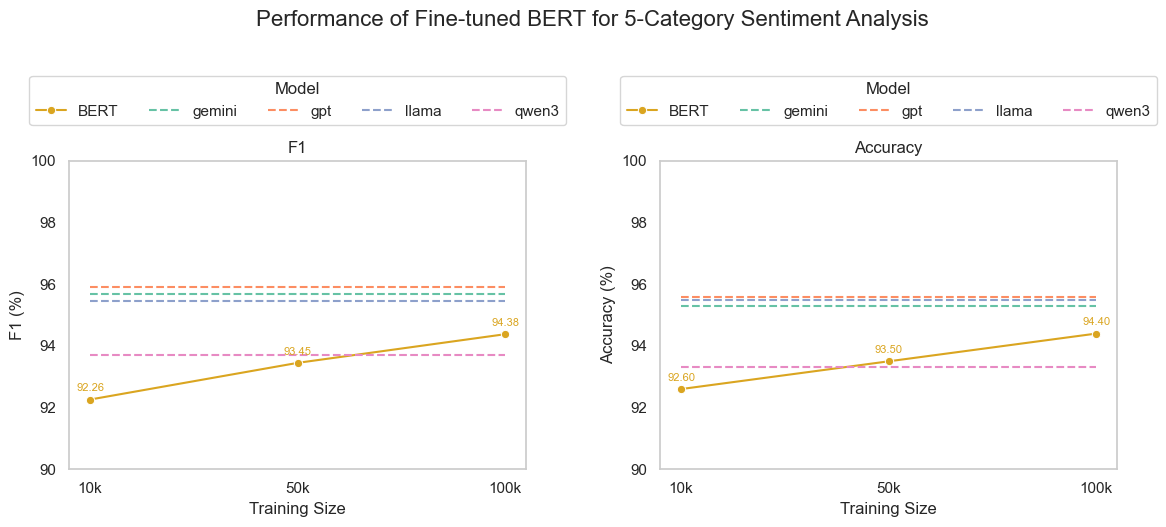

In [21]:
# Make a temp dataframe for best LLM performances so that we can compare with fine-tuned BERT and plot together easily
df_temp = df_one_off_metrics_5[df_one_off_metrics_5['model'] != 'bert'].copy()
df_temp_llm_best = df_temp.groupby('model').agg(best_f1=('f1', 'max'), best_accuracy=('accuracy', 'max')).reset_index()
df_temp_bert = df_one_off_metrics_5[df_one_off_metrics_5['model'] == 'bert'].copy()

plot_finetuned_bert_performance(df_temp_bert, df_temp_llm_best, ylim=(90,100))

We can further examine the confusion matrices to understand how the models differ in their predictions. For example, Gemini tends to classify ambiguous cases as 2- or 4-star reviews when it fails to predict the correct 3-star rating. In contrast, the BERT model shows a higher proportion of incorrect predictions falling into the 1-star category for actual 3-star reviews. 

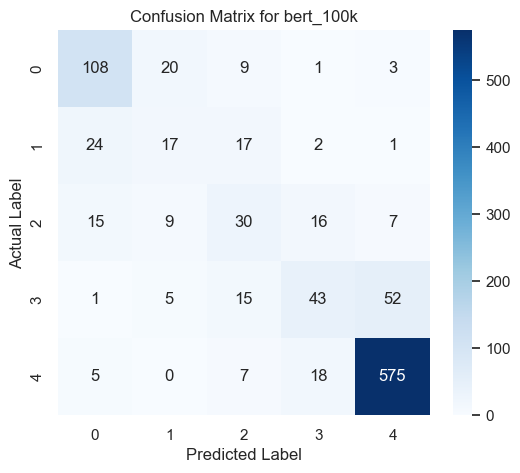

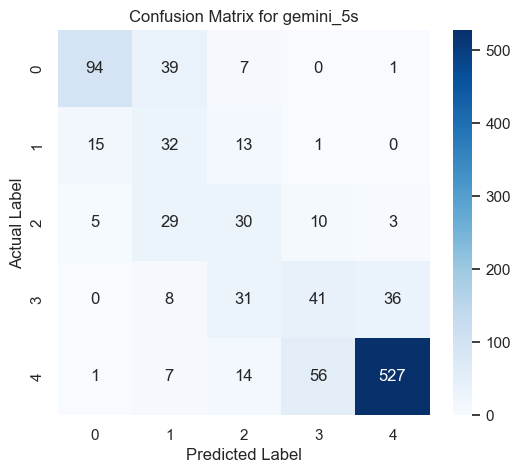

In [22]:
plot_confusion_matrix(df_metrics_5.loc[df_metrics_5['index'] == 'bert_100k', 'confusion_matrix'].values[0], 'bert_100k')
plot_confusion_matrix(df_metrics_5.loc[df_metrics_5['index'] == 'gemini_5s', 'confusion_matrix'].values[0], 'gemini_5s')

## Discussion (including Limitations and Implications)

Beyond the quantitative results, several practical challenges emerged when working with LLMs in this project. First, LLMs lack transparency and are more difficult to manage than traditional model-based approaches. Their predictions can vary between runs. for example, achieving an average 70.2% accuracy in one run and 70% in another. Although the difference is small, such inconsistency can be problematic in production environments. In applications like fraud detection, it would be confusing and potentially risky if the same post is sometimes flagged as safe and other times as fraudulent. Second, this inherent randomness also complicates debugging. Traditional deep learning models typically produce deterministic outputs, making errors easier to trace. LLMs, however, may produce slightly different outputs for the same input, which slows down troubleshooting. Third, batch processing, which is an essential technique for reducing processing time, can be an additional challenge for LLM predictions. Sometimes, even with structured output formatting and system instructions, LLMs may return an inconsistent number of outputs relative to the inputs. The lack of transparency and determinism makes it difficult to identify and resolve missing or misaligned entries. These limitations must be addressed before LLM-based systems can reliably replace traditional model-based pipelines in production.

⸻

On the positive side, LLMs are improving at an extraordinary rate. I still remember how impressive ChatGPT was when it launched in 2022, despite the occasional silly mistakes. In just three years, LLMs have become dramatically more capable, often responding with the fluency and reasoning of a real assistant. It’s entirely possible that some of the limitations I observed will be resolved within the next few months. Moreover, due to resource constraints, I wasn’t able to use the very latest LLM models, which may already address some of these issues. On the other hand, the nature of review data also introduces ambiguity. For example, reviews like “Not bad!” could correspond to either a 3-star or a 5-star rating, making the performance evaluation noisy. Finally, because LLMs are trained on extensive online text corpora, it is highly likely that Amazon review patterns (1996–2023) appear in their training data, giving them an advantage in sentiment detection compared to a fine-tuned model.

## Conclusion
In this project, I simulated two types of sentiment analysis tasks—simple and complex—using Amazon Review Data to compare the performance of four different LLMs and a fine-tuned BERT model. The results show that LLMs and the fine-tuned BERT model perform similarly on the simple task, with zero-shot LLMs even achieving performance comparable to the fine-tuned BERT model. For the more complex task, however, the fine-tuned BERT model performs better than the LLMs when a large amount of training data is available. I also observed that prompting has a noticeable impact on performance. For some models, such as Qwen and Gemini, show clear improvements with prompting, while others do not benefit. In fact, for Llama 4 Maverick, excessive prompting can even degrade performance. Finally, by examining the 1-off performance, I found that the fine-tuned BERT model provides higher exact prediction accuracy, whereas LLMs achieve higher approximate prediction accuracy.

During the project, I also noticed that LLMs are harder to control and less transparent than traditional model-based approaches, which can lead to critical issues in real-world applications. Nonetheless, LLMs are improving rapidly, and future versions may address some of these limitations.



## References

- Hou, Y., Li, J., He, Z., Yan, A., Chen, X., & McAuley, J. (2024). Bridging language and items for retrieval and recommendation. arXiv. https://arxiv.org/abs/2403.03952

- Zou, Cui, et al. "An exploratory study of conventional machine learning and large language models for sentiment analysis." International Conference on Human-Computer Interaction. Cham: Springer Nature Switzerland, 2024. https://ink.library.smu.edu.sg/sis_research/9961

- Michailidis, P.D. A Comparative Study of Sentiment Classification Models for Greek Reviews. Big Data Cogn. Comput. 2024, 8, 107. https://doi.org/10.3390/bdcc8090107

- Ghatora, P.S.; Hosseini, S.E.; Pervez, S.; Iqbal, M.J.; Shaukat, N. Sentiment Analysis of Product Reviews Using Machine Learning and Pre-Trained LLM. Big Data Cogn. Comput. 2024, 8, 199. https://doi.org/10.3390/bdcc8120199

- Kang, J.-W.; Choi, S.-Y. Comparative Investigation of GPT and FinBERT’s Sentiment Analysis Performance in News Across Different Sectors. Electronics 2025, 14, 1090. https://doi.org/10.3390/electronics14061090

- Boitel, Enguerrand, Alaa Mohasseb, and Ella Haig. "A comparative analysis of GPT-3 and BERT models for text-based emotion recognition: Performance, efficiency, and robustness." UK Workshop on Computational Intelligence. Cham: Springer Nature Switzerland, 2023. https://pure.port.ac.uk/ws/portalfiles/portal/78523961/UKCI_2023.pdf

- Steven J Sermarini. Comparing Sentiment Analysis across Large Language Models. Medium 2024-08-02 https://medium.com/@ssermari/comparing-sentiment-analysis-across-large-language-models-80c603888c80

- Andrew Li. A Case Study of Sentiment Analysis on Survey Data Using LLMs versus Dedicated Neural Networks NHSJS 2025-03-28 https://nhsjs.com/2025/a-case-study-of-sentiment-analysis-on-survey-data-using-llms-versus-dedicated-neural-networks/
